<a href="https://colab.research.google.com/github/nyksrox/NIKHILR/blob/master/Acf_%26_Pacf_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
#!pip install pyramid --trusted-host pypi.org --trusted-host files.pythonhosted.org --user
import pyramid

In [ ]:
data = pd.read_csv("C:\\Users\\nikhilran\\Desktop\\ts-bob\\RE__test_mail\\Train_ts_Data.csv")
data.Date = pd.to_datetime(data.Date)
data.to_csv("C:\\Users\\nikhilran\\Desktop\\ts-bob\\RE__test_mail\\New_Overall_Call_Volume_Orignial_Model_Data.csv")

df = pd.read_csv("C:\\Users\\nikhilran\\Desktop\\ts-bob\\RE__test_mail\\New_Overall_Call_Volume_Orignial_Model_Data.csv")

data1 = df[['Date','Offered']]

data1.reset_index(inplace=True)

data1['Date'] = pd.to_datetime(data1['Date'])


ts = data1.set_index('Date')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [ ]:
trend_diff = trend - trend.shift()
ts_diff = ts - ts.shift()

In [ ]:
seasonal_diff = seasonal - seasonal.shift()

C:\ProgramData\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


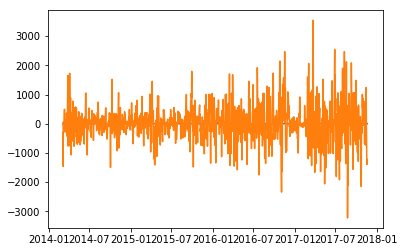

In [ ]:
plt.plot(trend_diff)

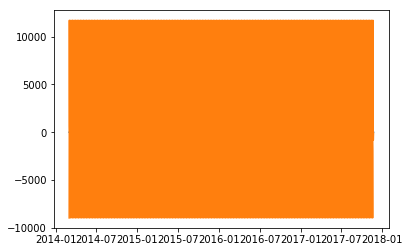

In [ ]:
plt.plot(seasonal_diff)

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
lag_acf = acf(trend_diff['Offered'], nlags=20)

#lag_acf = acf(trend['Offered'], nlags=20)

#lag_pacf = pacf(trend['Offered'], nlags=20)

lag_pacf = pacf(trend_diff['Offered'], nlags=20)

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

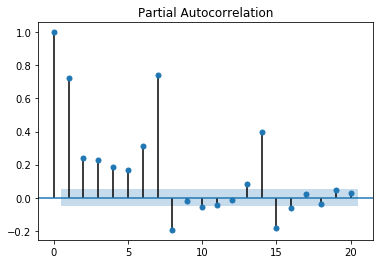

In [ ]:
plot_pacf(ts['Offered'], lags=20)
plt.show()

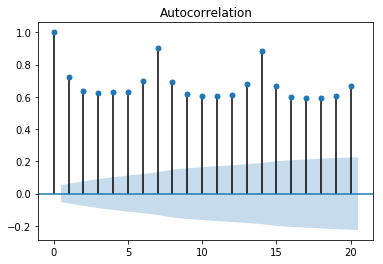

In [ ]:
plot_acf(ts['Offered'], lags=20)
plt.show()